<a href="https://colab.research.google.com/github/srahmawati/srahmawati/blob/main/PaperMuda_baru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
%matplotlib inline
import datetime as dt

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Import Dataset

In [75]:
# Import dataset
bist100 = pd.read_csv("https://raw.githubusercontent.com/srahmawati/srahmawati/main/KAEF.JK%20(1).csv")
bist100.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-02,3000.0,3550.0,2960.0,3230.0,3228.457520,58958700
1,2021-02-03,3300.0,3720.0,3270.0,3500.0,3498.328613,51684900
2,2021-02-04,3530.0,3580.0,3260.0,3260.0,3258.443115,15334800
3,2021-02-05,3260.0,3350.0,3050.0,3250.0,3248.447998,17843100
4,2021-02-08,3250.0,3480.0,3220.0,3400.0,3398.376221,27027300


In [76]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-02-02,3000.0,3550.0,2960.0,3230.0,3228.457520,58958700
1,2021-02-03,3300.0,3720.0,3270.0,3500.0,3498.328613,51684900
2,2021-02-04,3530.0,3580.0,3260.0,3260.0,3258.443115,15334800
3,2021-02-05,3260.0,3350.0,3050.0,3250.0,3248.447998,17843100
4,2021-02-08,3250.0,3480.0,3220.0,3400.0,3398.376221,27027300


#Preprocessing Data

##Checking null and na value

In [77]:
# Checking null value
bist100.isnull().sum()

date         0
open         0
high         0
low          0
close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
# Checking na value
bist100.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

In [79]:
# Checking Data type of each column
bist100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       248 non-null    object 
 1   open       248 non-null    float64
 2   high       248 non-null    float64
 3   low        248 non-null    float64
 4   close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


##Konversi tanggal dari string ke format tanggal

In [80]:
#konversi bidang tanggal dari string ke format Tanggal dan buat itu menjadi indeks
bist100['date'] = pd.to_datetime(bist100.date)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-02-02,3000.0,3550.0,2960.0,3230.0,3228.457520,58958700
1,2021-02-03,3300.0,3720.0,3270.0,3500.0,3498.328613,51684900
2,2021-02-04,3530.0,3580.0,3260.0,3260.0,3258.443115,15334800
3,2021-02-05,3260.0,3350.0,3050.0,3250.0,3248.447998,17843100
4,2021-02-08,3250.0,3480.0,3220.0,3400.0,3398.376221,27027300


##Menyortir kumpulan data berdasarkan format tanggal

In [81]:
bist100.sort_values(by='date', inplace=True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2021-02-02,3000.0,3550.0,2960.0,3230.0,3228.457520,58958700
1,2021-02-03,3300.0,3720.0,3270.0,3500.0,3498.328613,51684900
2,2021-02-04,3530.0,3580.0,3260.0,3260.0,3258.443115,15334800
3,2021-02-05,3260.0,3350.0,3050.0,3250.0,3248.447998,17843100
4,2021-02-08,3250.0,3480.0,3220.0,3400.0,3398.376221,27027300


In [82]:
bist100.shape

(248, 7)

#EDA - Exploratory Data Analysis

##Memunculkan durasi kumpulan data

In [83]:
print("Starting date: ",bist100.iloc[0][0])
print("Ending date: ", bist100.iloc[-1][0])
print("Duration: ", bist100.iloc[-1][0]-bist100.iloc[0][0])

Starting date:  2021-02-02 00:00:00
Ending date:  2022-02-02 00:00:00
Duration:  365 days 00:00:00


##Perbandingan bulanan antara harga aktual, pembukaan dan penutupan Saham

In [84]:
monthvise= bist100.groupby(bist100['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
January,2313.333333,2293.809524
September,2366.818182,2362.727273
August,2474.000000,2450.000000
November,2452.272727,2458.636364
December,2519.545455,2499.545455


In [85]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

##Harga saham Tinggi dan Rendah setiap bulan

In [86]:
bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

date
April        2450.0
August       2270.0
December     2410.0
February     2170.0
January      2040.0
July         2660.0
June         2190.0
March        2530.0
May          2370.0
November     2380.0
October      2360.0
September    2300.0
Name: low, dtype: float64

In [87]:
monthvise_high= bist100.groupby(bist100['date'].dt.strftime('%B'))['high'].max()
monthvise_low= bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

In [88]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

##Perbandingan trend antara harga saham, harga buka, harga tutup, harga tinggi, harga rendah

In [89]:
from itertools import cycle


In [90]:
bist100

,date,open,high,low,close,Adj Close,Volume
0,2021-02-02,3000.0,3550.0,2960.0,3230.0,3228.457520,58958700
1,2021-02-03,3300.0,3720.0,3270.0,3500.0,3498.328613,51684900
2,2021-02-04,3530.0,3580.0,3260.0,3260.0,3258.443115,15334800
3,2021-02-05,3260.0,3350.0,3050.0,3250.0,3248.447998,17843100
4,2021-02-08,3250.0,3480.0,3220.0,3400.0,3398.376221,27027300
...,...,...,...,...,...,...,...
243,2022-01-26,2120.0,2170.0,2100.0,2140.0,2140.000000,987200
244,2022-01-27,2150.0,2210.0,2140.0,2190.0,2190.000000,1941500
245,2022-01-28,2190.0,2210.0,2140.0,2170.0,2170.000000,1078800
246,2022-01-31,2180.0,2250.0,2150.0,2200.0,2200.000000,2629500


In [91]:
bist100['open']

0      3000.0
1      3300.0
2      3530.0
3      3260.0
4      3250.0
        ...  
243    2120.0
244    2150.0
245    2190.0
246    2180.0
247    2220.0
Name: open, Length: 248, dtype: float64

In [92]:
import plotly.express as px 


# Plot 
fig = go.Figure()
fig = px.line(title='Harga Saham Kimia Farma Tbk')
fig.add_scatter(x=bist100['date'], y=bist100['open'], mode='lines', name="Stock Open Price")
fig.add_scatter(x=bist100['date'], y=bist100['high'], mode='lines', name="Stock Close Price")
fig.add_scatter(x=bist100['date'], y=bist100['low'], mode='lines', name="Stock High Price")
fig.add_scatter(x=bist100['date'], y=bist100['close'], mode='lines', name="Stock Low Price")

# Show plot 
fig.show()

Close price prediction preparation and preprocessing

#Buat kerangka data terpisah dengan harga penutupan

In [93]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (248, 2)


#Merencanakan karakter harga penutupan saham

In [94]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Normalisasi / penskalaan nilai dekat antara 0 hingga 1

In [95]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(248, 1)


#Split data for training and testing
Ratio for training and testing data is 65:35

In [96]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (161, 1)
test_data:  (87, 1)


#Create new dataset according to requirement of time-series prediction

In [97]:
# mengonversi larik nilai menjadi matriks kumpulan data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [98]:
# bentuk ulang menjadi X=t,t+1,t+2,t+3 dan Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test:", y_test.shape)

X_train:  (145, 15)
y_train:  (145,)
X_test:  (71, 15)
y_test: (71,)


#Algorithms

#Super vector regression - SVR

In [99]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [100]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (71, 1)


In [101]:
# Ubah kembali ke bentuk aslinya
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [102]:
svrtrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
svrtrain_p['Data_Aktual'] = original_ytrain
print(svrtrain_p.head())

print('\n')
svrtest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
svrtest_p['Data_Aktual'] = original_ytest
print(svrtest_p.head())

   Train_Predict  Data_Aktual
0    3593.114939       3590.0
1    3541.825575       3650.0
2    3659.911562       3530.0
3    3461.234114       3610.0
4    3496.647169       3600.0


   Test_Predict  Data_Aktual
0   2534.568794       2410.0
1   2589.985072       2440.0
2   2592.978654       2470.0
3   2543.688039       2460.0
4   2607.609521       2420.0


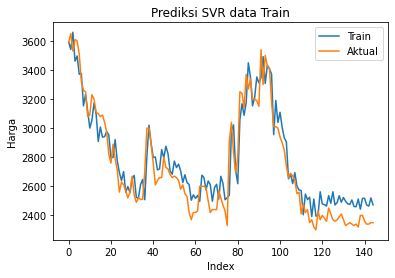

In [103]:
plt.plot(svrtrain_p.index,svrtrain_p.Train_Predict)
plt.plot(svrtrain_p.index,svrtrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi SVR data Train')
plt.show()

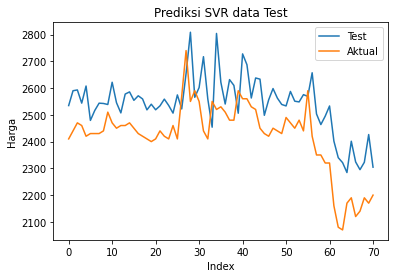

In [104]:
plt.plot(svrtest_p.index,svrtest_p.Test_Predict)
plt.plot(svrtest_p.index,svrtest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi SVR data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [105]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  122.08754535345471
Train data MSE:  14905.368730431863
Test data MAE:  103.43375665507092
-------------------------------------------------------------------------------------
Test data RMSE:  143.95247812779806
Test data MSE:  20722.315959134176
Test data MAE:  129.1522430761701


##Dijelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [106]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9058975303532385
Test data explained variance regression score: 0.6073559227584335


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [107]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8874269273426063
Test data R2 score: -0.24101497790286053


Regression Loss Mean Gamma deviance regression loss (MGD) dan Mean Poisson deviance regression loss (MPD)

In [108]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.002018205882950276
Test data MGD:  0.003391802409481489
----------------------------------------------------------------------
Train data MPD:  5.450185717358558
Test data MPD:  8.36737804753599


Perbandingan antara harga penutupan saham asli vs harga penutupan yang diprediksi

Predicting next 10 days

In [109]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [110]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [111]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Merencanakan seluruh harga saham penutupan dengan prediksi

In [112]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Random Forest Regressor - RF

In [113]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [114]:
# Lets Do the prediction 

train_predict=rfr.predict(X_train)
test_predict=rfr.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (71, 1)


In [115]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [116]:
rfrtrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
rfrtrain_p['Data_Aktual'] = original_ytrain
print(rfrtrain_p.head())

print('\n')
rfrtest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
rfrtest_p['Data_Aktual'] = original_ytest
print(rfrtest_p.head())

   Train_Predict  Data_Aktual
0         3571.8       3590.0
1         3616.6       3650.0
2         3533.0       3530.0
3         3571.4       3610.0
4         3560.1       3600.0


   Test_Predict  Data_Aktual
0        2480.1       2410.0
1        2445.7       2440.0
2        2443.3       2470.0
3        2457.7       2460.0
4        2450.8       2420.0


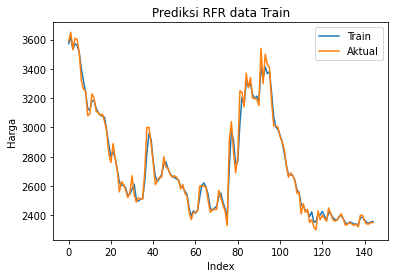

In [117]:
plt.plot(rfrtrain_p.index,rfrtrain_p.Train_Predict)
plt.plot(rfrtrain_p.index,rfrtrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi RFR data Train')
plt.show()

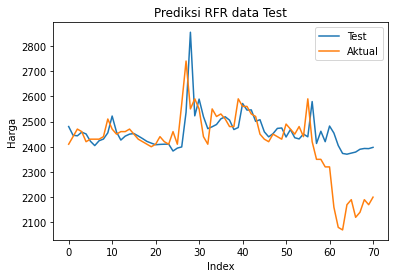

In [118]:
plt.plot(rfrtest_p.index,rfrtest_p.Test_Predict)
plt.plot(rfrtest_p.index,rfrtest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi RFR data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [119]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  44.11021775444808
Train data MSE:  1945.7113103448269
Test data MAE:  28.43586206896551
-------------------------------------------------------------------------------------
Test data RMSE:  115.9465946757446
Test data MSE:  13443.612816901408
Test data MAE:  75.01549295774646


##Menjelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [120]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9853079019854448
Test data explained variance regression score: 0.2793867868938149


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [121]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9853049793888987
Test data R2 score: 0.19489091394017144


Regression Loss Mean Gamma deviance regression loss (MGD) dan Mean Poisson deviance regression loss (MPD)

In [122]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00023368978140974662
Test data MGD:  0.00236440533243922
----------------------------------------------------------------------
Train data MPD:  0.6703502635273253
Test data MPD:  5.6273288197743705


Comparision between original stock close price vs predicted close price

In [123]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Train predicted data:  (248, 1)
Test predicted data:  (248, 1)


Predicting next 10 days

In [124]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = rfr.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = rfr.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [125]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [126]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Merencanakan seluruh harga saham penutupan dengan prediksi

In [127]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Decision Tree Regressor-DT

In [128]:
dt = DecisionTreeRegressor(random_state=0 ,max_leaf_nodes=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)

In [129]:
# Lets Do the prediction 

train_predict=dt.predict(X_train)
test_predict=dt.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (145, 1)
Test data prediction: (71, 1)


In [130]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [131]:
dttrain_p = pd.DataFrame(train_predict, columns=["Train_Predict"])
dttrain_p['Data_Aktual'] = original_ytrain
print(dttrain_p.head())

print('\n')
dttest_p = pd.DataFrame(test_predict, columns=["Test_Predict"])
dttest_p['Data_Aktual'] = original_ytest
print(dttest_p.head())

   Train_Predict  Data_Aktual
0         3600.0       3590.0
1         3650.0       3650.0
2         3530.0       3530.0
3         3600.0       3610.0
4         3600.0       3600.0


   Test_Predict  Data_Aktual
0        2440.0       2410.0
1        2440.0       2440.0
2        2420.0       2470.0
3        2430.0       2460.0
4        2430.0       2420.0


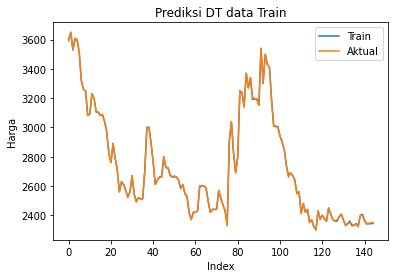

In [132]:
plt.plot(dttrain_p.index,dttrain_p.Train_Predict)
plt.plot(dttrain_p.index,dttrain_p.Data_Aktual)
plt.legend(['Train','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi DT data Train')
plt.show()

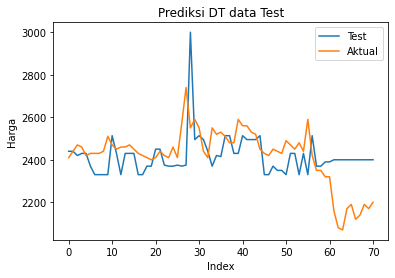

In [133]:
plt.plot(dttest_p.index,dttest_p.Test_Predict)
plt.plot(dttest_p.index,dttest_p.Data_Aktual)
plt.legend(['Test','Aktual'])
plt.xlabel('Index')
plt.ylabel('Harga')
plt.title('Prediksi DT data Test')
plt.show()

##Metrik evaluasi RMSE, MSE dan MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) dan Mean absolute Error (MAE) adalah cara standar untuk mengukur kesalahan model dalam memprediksi data kuantitatif.

In [134]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.7416573867739413
Train data MSE:  14.0
Test data MAE:  2.1103448275862102
-------------------------------------------------------------------------------------
Test data RMSE:  142.51115323016717
Test data MSE:  20309.42879499218
Test data MAE:  104.85915492957751


##Menjelaskan skor regresi varians
Skor varians yang dijelaskan menjelaskan penyebaran kesalahan dari kumpulan data yang diberikan, dan rumusnya ditulis sebagai berikut: Di sini, dan Var(y) masing-masing adalah varians dari kesalahan prediksi dan nilai aktual. Skor mendekati 1,0 sangat diinginkan, menunjukkan kuadrat deviasi standar kesalahan yang lebih baik.

In [135]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9998942647414025
Test data explained variance regression score: -0.2149012099275842


##Skor R2 untuk regresi
R-kuadrat (R2) adalah ukuran statistik yang mewakili proporsi varians untuk variabel dependen yang dijelaskan oleh variabel independen atau variabel dalam model regresi.

1 = Terbaik

0 atau < 0 = lebih buruk

In [136]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9998942647414025
Test data R2 score: -0.21628805279012053


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [137]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  1.9940446264548205e-06
Test data MGD:  0.003477189387824677
----------------------------------------------------------------------
Train data MPD:  0.005235833817629288
Test data MPD:  8.382142416954837


Perbandingan antara harga penutupan saham asli vs harga penutupan yang diprediksi

In [138]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (248, 1)
Test predicted data:  (248, 1)


Predicting next 10 days

In [139]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = dt.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = dt.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


Plotting last 15 days and next predicted 10 days

In [140]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [141]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Merencanakan seluruh harga saham penutupan dengan prediksi

In [142]:
dtdf=closedf.tolist()
dtdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
dtdf=scaler.inverse_transform(dtdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(dtdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [143]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'dt':dtdf,
})
finaldf.head()

,svr,rf,dt
0,3230.0,3230.0,3230.0
1,3500.0,3500.0,3500.0
2,3260.0,3260.0,3260.0
3,3250.0,3250.0,3250.0
4,3400.0,3400.0,3400.0


#Conclusion Chart

In [144]:
names = cycle(['SVR', 'RF','DT'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:],finaldf['dt'][225:]],
                                            labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()